In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [3]:
alldata = loadmat('danePV2012-2018.mat')
alldata.keys()


dict_keys(['__header__', '__version__', '__globals__', 'F_442', 'F_474', 'F_973', 'IS_040', 'IS_612', 'IS_734', 'I_442', 'I_474', 'I_973', 'P_442', 'P_474', 'P_973', 'TA_040', 'TA_612', 'TA_734', 'TM_040', 'TM_612', 'TM_734', 'T_RES', 'U_442', 'U_474', 'U_973', 'WV_040', 'WV_612', 'WV_734'])

In [4]:
MonoPower = alldata['P_442']
scaler = MinMaxScaler()
MonoPower = scaler.fit_transform(MonoPower)

AmbTemp = alldata['TA_612']
scaler_at = MinMaxScaler()
AmbTemp = scaler_at.fit_transform(AmbTemp)

MonoIrr = alldata['IS_040']
scaler_model = MinMaxScaler()
MonoIrr = scaler_model.fit_transform(MonoIrr)

MonoTemp_m = alldata['TM_040']
scaler_m = MinMaxScaler()
MonoTemp_m = scaler_m.fit_transform(MonoTemp_m)

MonoWind = alldata['WV_040']
scaler_w = MinMaxScaler()
MonoWind = scaler_w.fit_transform(MonoWind)


In [5]:
df_input = np.concatenate((MonoIrr,AmbTemp),axis=1)
print(df_input)


[[0.00000000e+00 2.11527166e-01]
 [1.94558661e-04 2.11527166e-01]
 [4.59972441e-04 2.11527166e-01]
 ...
 [8.74262000e-04 2.68501065e-01]
 [8.43086302e-04 2.67676683e-01]
 [8.43086302e-04 2.67386337e-01]]


In [6]:

df_output = MonoPower


In [7]:
#Input parameters
input_par = df_input[157680:-1]
input_par = pd.DataFrame(input_par)
input_par.head(-1)

,0,1
0,0.000536,0.328590
1,0.000627,0.329736
2,0.000766,0.330045
3,0.000780,0.328710
4,0.000763,0.327697
...,...,...
201771,0.000843,0.265327
201772,0.000843,0.265648
201773,0.000813,0.267938
201774,0.000843,0.267932


In [8]:
#Output Parameter
output = df_output[157680:-1]
output = pd.DataFrame(output)

In [9]:
shift_1 = input_par.shift(1,axis = 0)
# shift_2 = input_par.shift(2,axis = 0)
# shift_3 = input_par.shift(3,axis = 0)
shift_o_1 = output.shift(1,axis = 0)
# shift_o_2 = output.shift(2,axis = 0)
# shift_o_3 = output.shift(3,axis = 0)
input_par = pd.concat([output,shift_o_1,shift_1],axis = 1)
input_par.columns = ['output_power(t)','output_power(t-1)','MonoIrr(t-1)','AmbTemp(t-1)']
input_par1 = input_par
input_par = input_par.dropna(axis=0)
input_par.head(-1)

,output_power(t),output_power(t-1),MonoIrr(t-1),AmbTemp(t-1)
1,0.0,0.0,0.000536,0.328590
2,0.0,0.0,0.000627,0.329736
3,0.0,0.0,0.000766,0.330045
4,0.0,0.0,0.000780,0.328710
5,0.0,0.0,0.000763,0.327697
...,...,...,...,...
201771,0.0,0.0,0.000843,0.266595
201772,0.0,0.0,0.000843,0.265327
201773,0.0,0.0,0.000843,0.265648
201774,0.0,0.0,0.000813,0.267938


In [10]:
# from sklearn.datasets.samples_generator import make_blobs
# from sklearn.cluster import KMeans

# input_par_cluster = input_par.iloc[254340:306900]
# input_par_cluster_t = input_par.iloc[254340:306900]
# input_par_cluster = input_par_cluster[["output_power(t-1)"]] 
# input_par_cluster_t = input_par_cluster_t[["AmbTemp(t-1)"]] 
# input_par_cluster = input_par_cluster.groupby(np.arange(len(input_par_cluster))//144).mean()
# input_par_cluster_t = input_par_cluster_t.groupby(np.arange(len(input_par_cluster_t))//144).mean()
# input_par_cluster = input_par_cluster.values
# input_par_cluster = input_par_cluster.reshape(-1,1) 
# input_par_cluster_t = input_par_cluster_t.values
# input_par_cluster_t = input_par_cluster_t.reshape(-1,1) 

# wcss = []
# for i in range(1, 10):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(input_par_cluster)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 10), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()




In [11]:
# kmeans = KMeans(n_clusters=2, init='k-means++', max_iter= 300, n_init=10, random_state=0)
# pred_y = kmeans.fit_predict(input_par_cluster)
# plt.scatter(input_par_cluster, input_par_cluster_t)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
# plt.show()

In [12]:
# input_par_cluster = input_par.iloc[254340:306900]
# input_par_cluster = input_par_cluster[["output_power(t-1)","AmbTemp(t-1)"]] 
# input_par_cluster = input_par_cluster.groupby(np.arange(len(input_par_cluster))//144).mean()
# input_par_cluster.values

In [13]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(input_par,output, n_steps):
	X, y = list(), list()
	for i in range(len(input_par)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(input_par):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = input_par[i:end_ix,:], output[end_ix-1,:]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

n_steps = 2

In [14]:
#test-train split

n = round(0.1*len(input_par))

def random_split(seq, n):
    import random
#     random.seed( 30 )
    x = list()
    index = random.randrange(len(seq))
    x = seq[index:index+n]
    return x, index
    

Using TensorFlow backend.


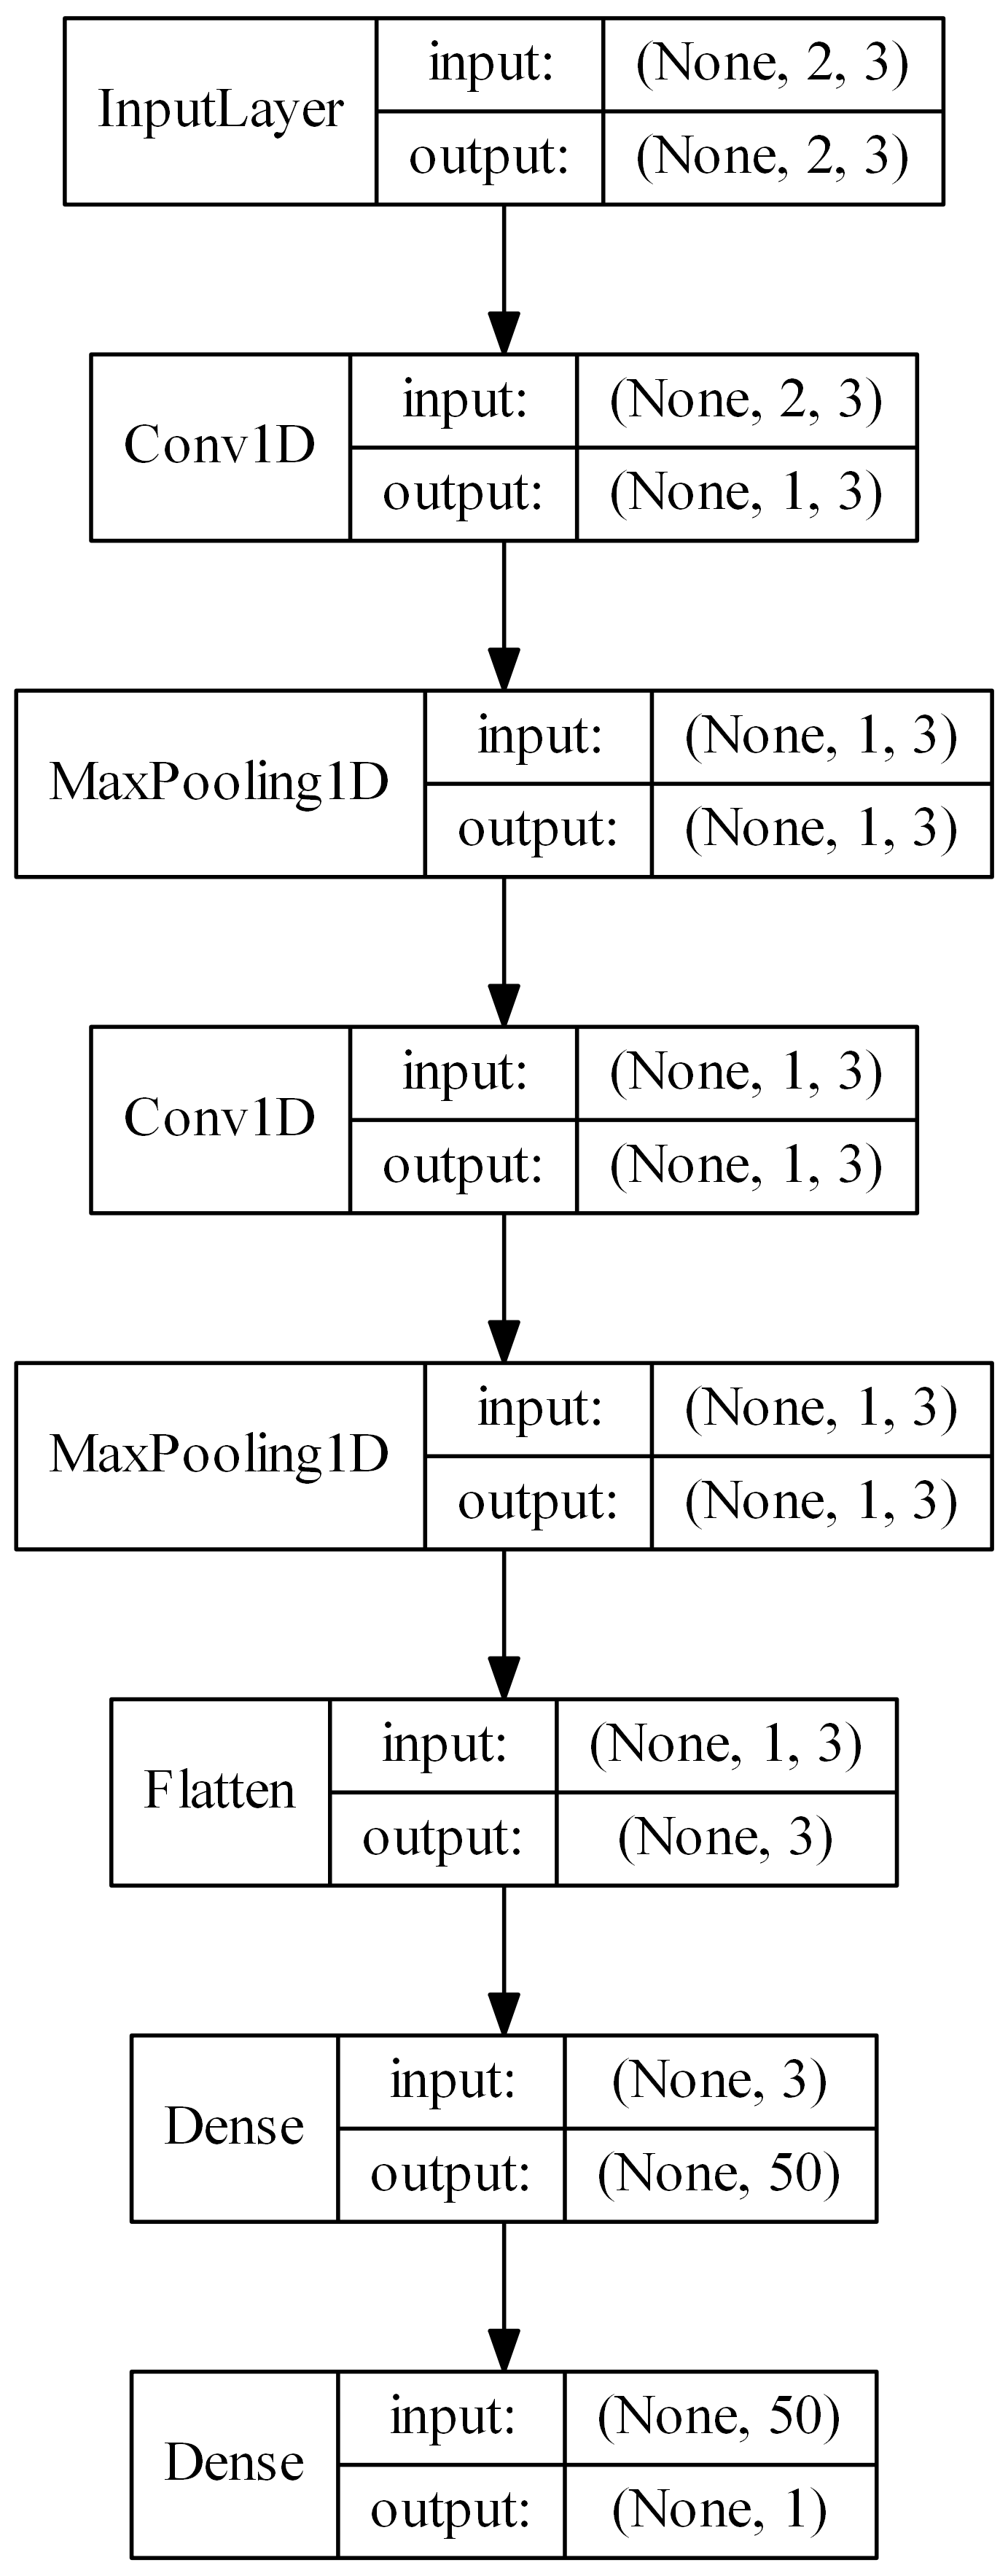

In [15]:
n_features = 3
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import AveragePooling1D
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import Concatenate
from keras.utils import plot_model

# define model
model = Sequential()
model.add(Conv1D(filters=3, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=3, kernel_size=1, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_names=False, dpi = 400, to_file='predict_cnn_autoencoder.png')

In [ ]:

from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit
from scipy.stats.distributions import t
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

n_iter = 1
ndays = 1
s_day = 6*24*ndays

rms_new = np.zeros(n_iter, dtype= float)
rms_cnn = np.zeros(n_iter, dtype= float)
mae_cnn = np.zeros(n_iter, dtype= float)
mean_forecast_errors_cnn = np.zeros(n_iter, dtype= float)

for i in range(0, n_iter):
    
    test_set, index = random_split(input_par,n)
    train_set = input_par.drop(input_par.index[index:index+n])
    
    
    input_sp = train_set.iloc[:,1:11]
    output_sp = pd.DataFrame(train_set.loc[:,'output_power(t)'])
    
    X_sp, y_sp = split_sequences(input_sp.values,output_sp.values, n_steps)
    y_sp = y_sp.reshape((y_sp.shape[0], y_sp.shape[1]))
    
    history_sp = model.fit(X_sp, y_sp, epochs=25, batch_size= 72, verbose=0)
    history_sp.history.keys()
    
    x_eval = test_set.iloc[:,1:11]
    y_eval = pd.DataFrame(test_set.loc[:,'output_power(t)'])
    x_eval_tot  = x_eval[0:s_day+1].values
    y_eval_tot  = y_eval[0:s_day+1].values
    y_eval_tot = y_eval_tot.reshape(-1,1)
    X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
    yhat_sp = model.predict(X_check_tot, verbose=0)
    yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
    
    yhat_act_wp = scaler.inverse_transform(yhat_sp)
    y_check_act_wp = scaler.inverse_transform(y_check_tot)
    
    rms_cnn[i] = np.sqrt(mean_squared_error(y_check_act_wp, yhat_act_wp))
    mae_cnn[i] = mean_absolute_error(y_check_act_wp, yhat_act_wp)
    forecast_errors_cnn = [y_check_act_wp[k]-yhat_act_wp[k] for k in range(len(yhat_act_wp))]
    mean_forecast_errors_cnn[i] = np.mean(forecast_errors_cnn)

In [ ]:


# from keras.models import load_model
# model.save('CNN_thesis.h5')
# del model  # deletes the existing model
# rms_cnn

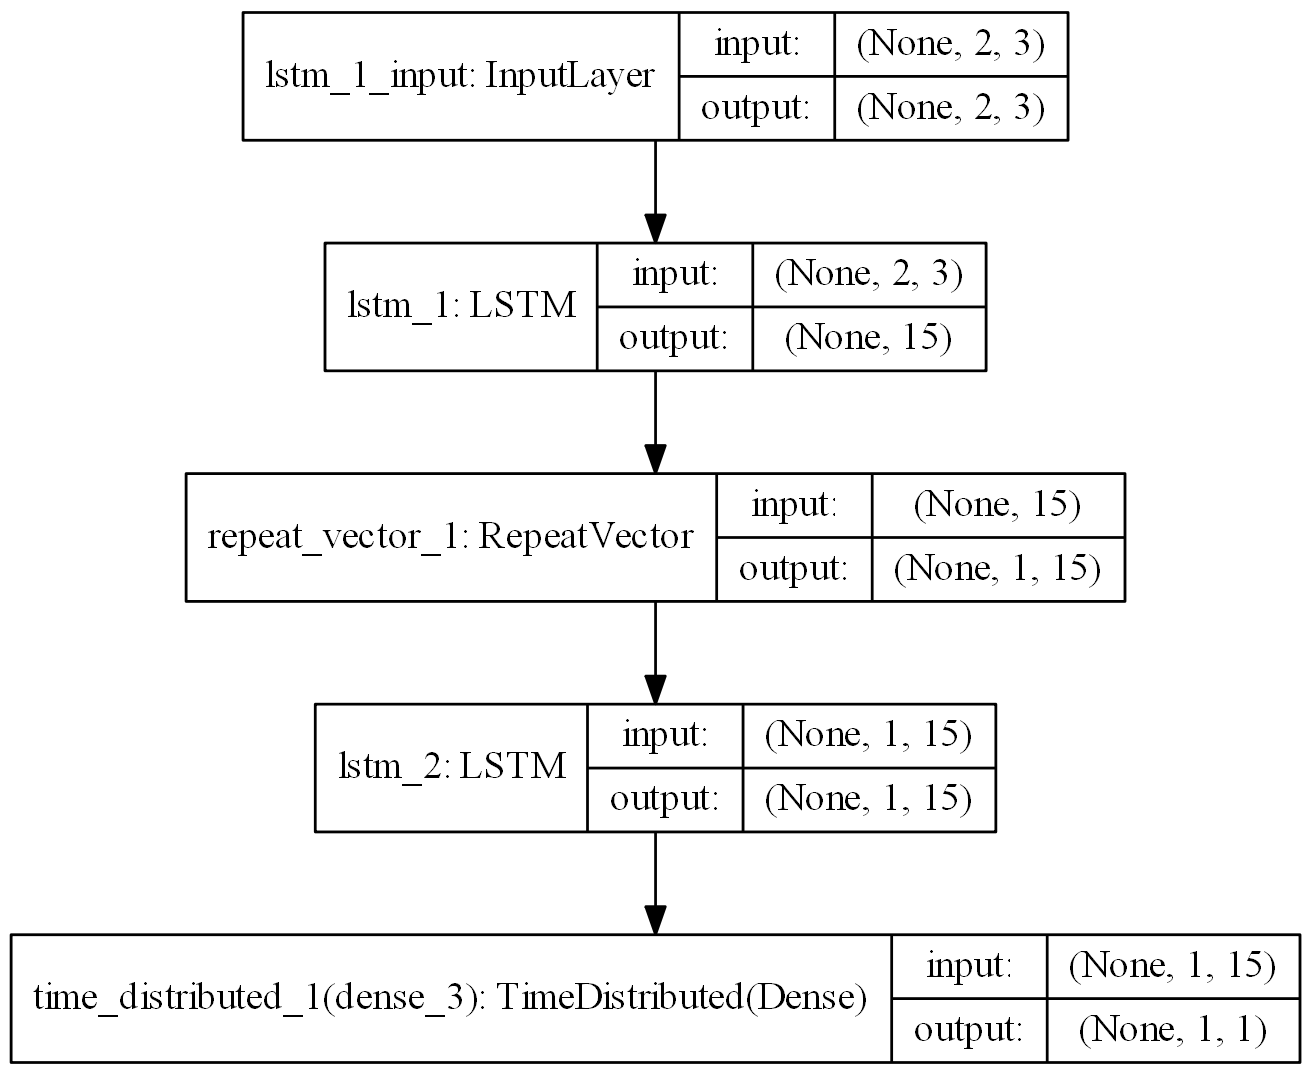

In [18]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

# define model
model_ae = Sequential()
model_ae.add(LSTM(15, activation='relu', input_shape=(n_steps, n_features)))
model_ae.add(RepeatVector(1))
model_ae.add(LSTM(15, activation='relu', return_sequences=True))
model_ae.add(TimeDistributed(Dense(1)))
model_ae.compile(optimizer='adam', loss='mse')
plot_model(model_ae, show_shapes=True, rankdir = 'TB',show_layer_names=True, expand_nested = False, dpi=200, to_file='predict_lstm_autoencoder.png')


In [1]:
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

n_iter = 1
ndays = 1
s_day = 6*24*ndays

rms_ae = np.zeros(n_iter, dtype= float)
mae_ae = np.zeros(n_iter, dtype= float)
mean_forecast_errors_ae = np.zeros(n_iter, dtype= float)

for i in range(0, n_iter):


    test_set, index = random_split(input_par,n)
    train_set = input_par.drop(input_par.index[index:index+n])
    
    
    input_sp = train_set.iloc[:,1:11]
    output_sp = pd.DataFrame(train_set.loc[:,'output_power(t)'])
    
    X_sp, y_sp = split_sequences(input_sp.values,output_sp.values, n_steps)
    y_sp = y_sp.reshape((y_sp.shape[0], y_sp.shape[1],1))
    
    history_ae = model_ae.fit(X_sp, y_sp, epochs=15, batch_size= 12, verbose=0)
    history_ae.history.keys()
    # convert into input/output

    x_eval = test_set.iloc[:,1:11]
    y_eval = pd.DataFrame(test_set.loc[:,'output_power(t)'])
    x_eval_tot  = x_eval[0:s_day+1].values
    y_eval_tot  = y_eval[0:s_day+1].values
    y_eval_tot = y_eval_tot.reshape(-1,1)
    X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
    yhat_sp = model_ae.predict(X_check_tot, verbose=0)
    yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
    
    yhat_act_wp = scaler.inverse_transform(yhat_sp)
    y_check_act_wp = scaler.inverse_transform(y_check_tot)
    
    rms_ae[i] = np.sqrt(mean_squared_error(y_check_act_wp, yhat_act_wp))
    mae_ae[i] = mean_absolute_error(y_check_act_wp, yhat_act_wp)
    forecast_errors_ae = [y_check_act_wp[k]-yhat_act_wp[k] for k in range(len(yhat_act_wp))]
    mean_forecast_errors_ae[i] = np.mean(forecast_errors_ae)


NameError: name 'np' is not defined

In [ ]:


from keras.models import load_model
model.save('LSTM_ae_thesis.h5')
rms_ae

In [ ]:
## Multi - headed CNN 

n_features = 1
from keras.models import Model
from keras.layers.merge import concatenate

visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(filters=1, kernel_size=2, activation='relu')(visible1)
cnn1 = MaxPooling1D(pool_size=1)(cnn1)
cnn1 = Flatten()(cnn1)

visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(filters=1, kernel_size=2, activation='relu')(visible2)
cnn2 = MaxPooling1D(pool_size=1)(cnn2)
cnn2 = Flatten()(cnn2)

visible3 = Input(shape=(n_steps, n_features))
cnn3 = Conv1D(filters=1, kernel_size=2, activation='relu')(visible3)
cnn3 = MaxPooling1D(pool_size=1)(cnn3)
cnn3 = Flatten()(cnn3)

merge = concatenate([cnn1, cnn2, cnn3])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)
model_multi = Model(inputs=[visible1, visible2, visible3], outputs=output)
model_multi.compile(optimizer='adam', loss='mse')

plot_model(model_multi, show_shapes=True, show_layer_names=False, dpi = 400, to_file='predict_multi.png')

In [ ]:
n_iter = 1
ndays = 1
s_day = 6*24*ndays

rms_new = np.zeros(n_iter, dtype= float)
rms_cnn_multi = np.zeros(n_iter, dtype= float)
mae_cnn_multi = np.zeros(n_iter, dtype= float)
mean_forecast_errors_cnn = np.zeros(n_iter, dtype= float)
yhat_wp_new = np.zeros(s_day, dtype= float)

for i in range(0, n_iter):
    
    test_set, index = random_split(input_par,n)
    train_set = input_par.drop(input_par.index[index:index+n])
    
    
    output_sp = pd.DataFrame(train_set.loc[:,'output_power(t)'])
    cnn1_inp = pd.DataFrame(train_set.loc[:,'output_power(t-1)'])
    cnn2_inp = pd.DataFrame(train_set.loc[:,'MonoIrr(t-1)'])  
    cnn3_inp = pd.DataFrame(train_set.loc[:,'AmbTemp(t-1)'])
    
    
    
    X_cnn1, y_sp = split_sequences(cnn1_inp.values,output_sp.values, n_steps)
    y_sp = y_sp.reshape((y_sp.shape[0], y_sp.shape[1]))
    
    X_cnn2, y_sp = split_sequences(cnn2_inp.values,output_sp.values, n_steps)
    y_sp = y_sp.reshape((y_sp.shape[0], y_sp.shape[1]))
    
    X_cnn3, y_sp = split_sequences(cnn3_inp.values,output_sp.values, n_steps)
    y_sp = y_sp.reshape((y_sp.shape[0], y_sp.shape[1]))
    
    history = model_multi.fit([X_cnn1, X_cnn2, X_cnn3], y_sp, epochs = 20, verbose=0)
    history.history.keys()
    
    x_eval_cnn1 = pd.DataFrame(test_set.loc[:,'output_power(t-1)'])
    x_eval_cnn2 = pd.DataFrame(test_set.loc[:,'MonoIrr(t-1)'])
    x_eval_cnn3 = pd.DataFrame(test_set.loc[:,'AmbTemp(t-1)'])
    y_eval = pd.DataFrame(test_set.loc[:,'output_power(t)'])
    x_eval_cnn1_tot  = x_eval_cnn1[0:s_day+1].values
    x_eval_cnn2_tot  = x_eval_cnn2[0:s_day+1].values
    x_eval_cnn3_tot  = x_eval_cnn3[0:s_day+1].values
    y_eval_tot  = y_eval[0:s_day+1].values
    y_eval_tot = y_eval_tot.reshape(-1,1)
    x_eval_cnn1_tot = y_eval_tot.reshape(-1,1)
    x_eval_cnn2_tot = y_eval_tot.reshape(-1,1)
    x_eval_cnn3_tot = y_eval_tot.reshape(-1,1)
    X_check_cnn1_tot, y_check_tot = split_sequences(x_eval_cnn1_tot,y_eval_tot, n_steps)
    X_check_cnn2_tot, y_check_tot = split_sequences(x_eval_cnn2_tot,y_eval_tot, n_steps)
    X_check_cnn3_tot, y_check_tot = split_sequences(x_eval_cnn3_tot,y_eval_tot, n_steps)
    yhat_sp_multi = model_multi.predict([X_check_cnn1_tot, X_check_cnn2_tot, X_check_cnn3_tot], verbose=0)
    yhat_sp_multi = yhat_sp_multi.reshape((yhat_sp_multi.shape[0], 1))
    
    yhat_act_wp_multi = scaler.inverse_transform(yhat_sp_multi)
    y_check_act_wp_multi = scaler.inverse_transform(y_check_tot)
    
    rms_cnn_multi[i] = np.sqrt(mean_squared_error(y_check_act_wp_multi, yhat_act_wp_multi))
    mae_cnn_multi[i] = mean_absolute_error(y_check_act_wp_multi, yhat_act_wp_multi)
    forecast_errors_cnn_multi = [y_check_act_wp_multi[k]-yhat_act_wp_multi[k] for k in range(len(yhat_act_wp_multi))]
    mean_forecast_errors_cnn[i] = np.mean(forecast_errors_cnn_multi)

In [ ]:
# rms_cnn_multi
# savetxt('rms_cnn_multi', rms_cnn_multi, delimiter=',')
# savetxt('mae_cnn_multi', mae_cnn_multi, delimiter=',')
# savetxt('mean_forecast_errors_cnn_multi', forecast_errors_cnn, delimiter=',')

In [ ]:
np.mean(mean_forecast_errors_cnn)
# model_multi.save('CNN_multi_head_thesis.h5')

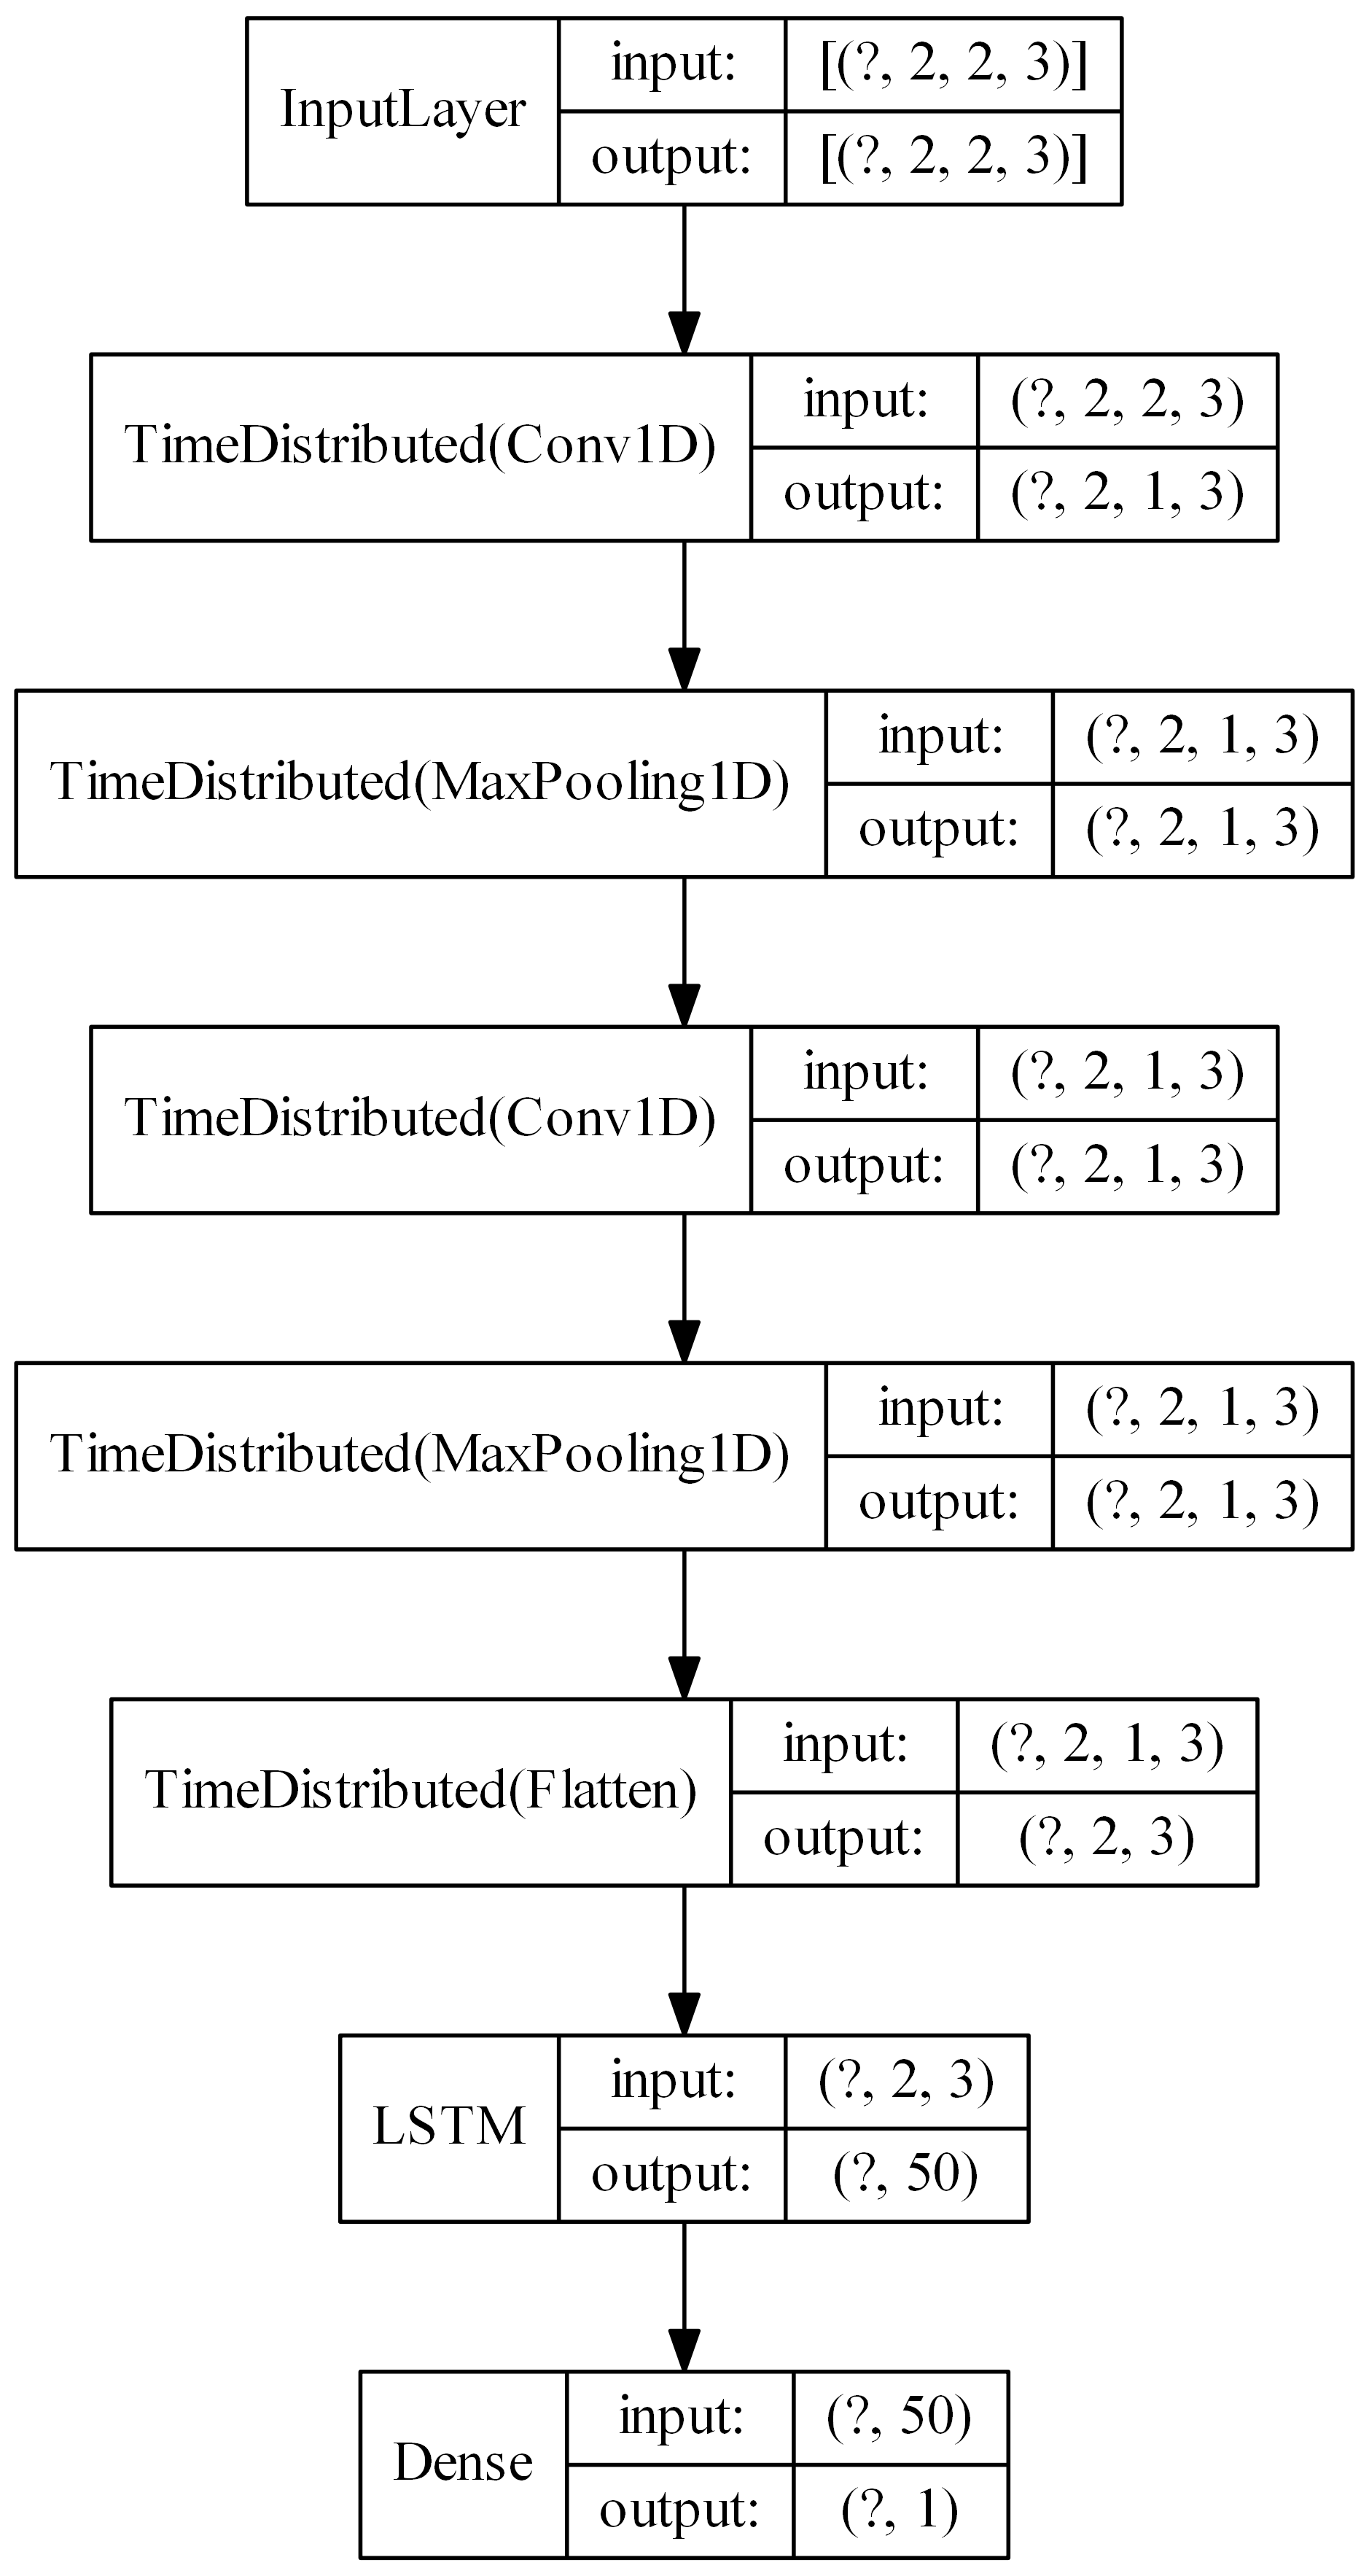

In [20]:
n_features = 3
n_seq1 = 2
n_seq2 = 1
from numpy import array
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import TimeDistributed
from tensorflow.python.keras.layers.convolutional import Conv1D
from tensorflow.python.keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils  import plot_model

# define model
model_lstm = Sequential()
model_lstm.add(TimeDistributed(Conv1D(filters= 3, kernel_size=2, activation='relu'), input_shape=(2, n_steps, n_features)))
model_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_lstm.add(TimeDistributed(Conv1D(filters= 3, kernel_size=1, activation='relu'), input_shape=(1, n_steps, n_features)))
model_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_lstm.add(TimeDistributed(Flatten()))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
plot_model(model_lstm, show_shapes=True, show_layer_names=False, dpi = 400, to_file='predict_cnn_lstm.png')

In [21]:

from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


n_steps = 4
n_iter = 1
ndays = 1
s_day = 6*24*ndays

rms_new = np.zeros(n_iter, dtype= float)
rms_cnn_lstm = np.zeros(n_iter, dtype= float)
mae_cnn_lstm = np.zeros(n_iter, dtype= float)
rms_cnn_lstm = np.zeros(n_iter, dtype= float)
mean_forecast_errors_cnn_lstm = np.zeros(n_iter, dtype= float)

for i in range(0, n_iter):
    
    n_steps = 4
    test_set, index = random_split(input_par,n)
    train_set = input_par.drop(input_par.index[index:index+n])
    
    input_sp = train_set.iloc[:,1:11]
    output_sp = pd.DataFrame(train_set.loc[:,'output_power(t)'])
    
    X_sp_lstm, y_sp_lstm = split_sequences(input_sp.values,output_sp.values, n_steps)
    y_sp_lstm = y_sp_lstm.reshape((y_sp_lstm.shape[0], y_sp_lstm.shape[1]))
    
    n_seq = 2
    n_steps = 2
    
    X_sp_lstm = X_sp_lstm.reshape((X_sp_lstm.shape[0], n_seq, n_steps, n_features))
    
    history_sp_lstm = model_lstm.fit(X_sp_lstm, y_sp_lstm, epochs=20, batch_size= 72, verbose=0)
    history_sp_lstm.history.keys()
    
    x_eval_lstm = test_set.iloc[:,1:11]
    y_eval_lstm = pd.DataFrame(test_set.loc[:,'output_power(t)'])
    x_eval_tot_lstm  = x_eval_lstm[0:s_day+3].values
    y_eval_tot_lstm  = y_eval_lstm[0:s_day+3].values
    y_eval_tot_lstm = y_eval_tot_lstm.reshape(-1,1)
    n_steps = 4
    X_check_tot_lstm, y_check_tot_lstm = split_sequences(x_eval_tot_lstm,y_eval_tot_lstm, n_steps)
    n_steps = 2
    X_check_tot_lstm = X_check_tot_lstm.reshape((X_check_tot_lstm.shape[0], n_seq, n_steps, n_features))
    
    yhat_sp_lstm = model_lstm.predict(X_check_tot_lstm, verbose=0)
    yhat_sp_lstm = yhat_sp_lstm.reshape((yhat_sp_lstm.shape[0], 1))
    
    yhat_act_wp_lstm = scaler.inverse_transform(yhat_sp_lstm)
    y_check_act_wp_lstm = scaler.inverse_transform(y_check_tot_lstm)
    
    rms_cnn_lstm[i] = np.sqrt(mean_squared_error(y_check_act_wp_lstm, yhat_act_wp_lstm))
    mae_cnn_lstm[i] = mean_absolute_error(y_check_act_wp_lstm, yhat_act_wp_lstm)
    forecast_errors_cnn_lstm = [y_check_act_wp_lstm[k]-yhat_act_wp_lstm[k] for k in range(len(yhat_act_wp_lstm))]
    mean_forecast_errors_cnn_lstm[i] = np.mean(forecast_errors_cnn_lstm)

In [ ]:
np.mean(mean_forecast_errors_cnn_lstm)

# from keras.models import load_model
# model.save('CNN_lstm_thesis.h5')
# del model  # deletes the existing model

In [ ]:
from numpy import asarray
from numpy import savetxt

savetxt('rms_cnn_lstm', rms_cnn_lstm, delimiter=',')
# savetxt('rms_cnn_multi', rms_cnn_multi, delimiter=',')
# savetxt('rms_cnn', rms_cnn, delimiter=',')

savetxt('mae_cnn_lstm', mae_cnn_lstm, delimiter=',')
# savetxt('mae_cnn_multi', mae_cnn_multi, delimiter=',')
# savetxt('mae_cnn', mae_cnn, delimiter=',')

savetxt('mean_forecast_errors_cnn_lstm', forecast_errors_cnn_lstm, delimiter=',')
# savetxt('mean_forecast_errors_cnn_multi', forecast_errors_cnn_multi, delimiter=',')
# savetxt('mean_forecast_errors_cnn', forecast_errors_cnn, delimiter=',')


In [ ]:
from numpy import loadtxt
rms_cnn_lstm = loadtxt('rms_cnn_lstm', delimiter=',')

In [ ]:
import matplotlib.pyplot as plt
plt.hist(rms_cnn_lstm,bins = 10, histtype = 'bar', color = 'green')
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.xlabel('rmse', fontsize = 24)
plt.ylabel('frequency', fontsize = 24)
plt.grid(b = True)

In [ ]:
test_set, index = random_split(input_par,n)
train_set = input_par.drop(input_par.index[index:index+n])





In [ ]:
from keras.models import load_model
model = tf.keras.models.load_model('CNN_thesis.h5')
model_multi = tf.keras.models.load_model('CNN_multi_head_thesis.h5')
# model_lstm = tf.keras.models.load_model('CNN_lstm_thesis.h5')


#days - 17171,47556, 58212, 88164 
test_inp = df_input[0:1000]
test_out = df_output[0:1000]
test_inp = pd.DataFrame(test_inp)
test_out = pd.DataFrame(test_out)
shift_1t = test_inp.shift(1,axis = 0)
shift_o_1t = test_out.shift(1,axis = 0)
input_par_t = pd.concat([test_out,shift_o_1t,shift_1t],axis = 1)
input_par_t.columns = ['output_power(t)','output_power(t-1)','MonoIrr(t-1)','AmbTemp(t-1)']
test_set = input_par_t

x_eval = test_set.iloc[:,1:11]
y_eval = pd.DataFrame(test_set.loc[:,'output_power(t)'])
x_eval_tot  = x_eval[0:s_day+1].values
y_eval_tot  = y_eval[0:s_day+1].values
y_eval_tot = y_eval_tot.reshape(-1,1)
                           
n_steps = 2                           
X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
yhat_sp = model.predict(X_check_tot, verbose=0)
yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
yhat_act_wp = scaler.inverse_transform(yhat_sp)
y_check_act_wp = scaler.inverse_transform(y_check_tot)
                           
x_eval_cnn1 = pd.DataFrame(test_set.loc[:,'output_power(t-1)'])
x_eval_cnn2 = pd.DataFrame(test_set.loc[:,'MonoIrr(t-1)'])
x_eval_cnn3 = pd.DataFrame(test_set.loc[:,'AmbTemp(t-1)'])
y_eval = pd.DataFrame(test_set.loc[:,'output_power(t)'])
x_eval_cnn1_tot  = x_eval_cnn1[0:s_day+1].values
x_eval_cnn2_tot  = x_eval_cnn2[0:s_day+1].values
x_eval_cnn3_tot  = x_eval_cnn3[0:s_day+1].values
y_eval_tot  = y_eval[0:s_day+1].values
y_eval_tot = y_eval_tot.reshape(-1,1)
x_eval_cnn1_tot = y_eval_tot.reshape(-1,1)
x_eval_cnn2_tot = y_eval_tot.reshape(-1,1)
x_eval_cnn3_tot = y_eval_tot.reshape(-1,1)
X_check_cnn1_tot, y_check_tot = split_sequences(x_eval_cnn1_tot,y_eval_tot, n_steps)
X_check_cnn2_tot, y_check_tot = split_sequences(x_eval_cnn2_tot,y_eval_tot, n_steps)
X_check_cnn3_tot, y_check_tot = split_sequences(x_eval_cnn3_tot,y_eval_tot, n_steps)
yhat_sp_multi = model_multi.predict([X_check_cnn1_tot, X_check_cnn2_tot, X_check_cnn3_tot], verbose=0)
yhat_sp_multi = yhat_sp_multi.reshape((yhat_sp_multi.shape[0], 1))   
yhat_act_wp_multi = scaler.inverse_transform(yhat_sp_multi)

x_eval_lstm = test_set.iloc[:,1:11]
y_eval_lstm = pd.DataFrame(test_set.loc[:,'output_power(t)'])
x_eval_tot_lstm  = x_eval_lstm[0:s_day+3].values
y_eval_tot_lstm  = y_eval_lstm[0:s_day+3].values
y_eval_tot_lstm = y_eval_tot_lstm.reshape(-1,1)
n_steps = 4
X_check_tot_lstm, y_check_tot_lstm = split_sequences(x_eval_tot_lstm,y_eval_tot_lstm, n_steps)
n_steps = 2
X_check_tot_lstm = X_check_tot_lstm.reshape((X_check_tot_lstm.shape[0], n_seq, n_steps, n_features))    
yhat_sp_lstm = model_lstm.predict(X_check_tot_lstm, verbose=0)
yhat_sp_lstm = yhat_sp_lstm.reshape((yhat_sp_lstm.shape[0], 1))
yhat_act_wp_lstm = scaler.inverse_transform(yhat_sp_lstm)                           


In [ ]:
t = np.linspace(0,24,24) 
plt.plot(t,y_check_act_wp/1000, linewidth=1.5)
plt.plot(t,yhat_act_wp /1000, linewidth=1.5)
plt.plot(t,yhat_act_wp_multi/1000, linewidth=1.5)
plt.plot(t,yhat_act_wp_lstm/1000, linewidth=1.5)
plt.tick_params(axis='x', labelsize = 24)
plt.tick_params(axis='y', labelsize = 24)
plt.title('1-day forecast', fontsize = 24)
plt.ylabel('Output (kW)', fontsize = 24)
plt.xlabel('Time (hrs)', fontsize = 24)
plt.legend(['Actual','CNN','Multi-CNN','CNN-LSTM'], loc='upper right')
plt.savefig(fname = "daywinter_Phd_thesis.png", dpi=400,orientation='portrait')
plt.grid(b = True)
plt.show()


In [ ]:
t = np.linspace(0,24,24*6) 
plt.plot(t,y_check_act_wp/1000)
plt.plot(t,yhat_act_wp /1000)
plt.plot(t,yhat_act_wp_multi/1000,'r')
plt.plot(t,yhat_act_wp_lstm/1000,'k')
plt.title('1-day forecast')
plt.ylabel('Output (kW)')
plt.xlabel('Time (hrs)')
plt.legend(['Actual','CNN','Multi-CNN','CNN-LSTM'], loc='upper right')
plt.savefig(fname = "day4_Phd_thesis.png", dpi=400,orientation='portrait')
plt.show()

In [ ]:
from numpy import loadtxt

rms_cnn = loadtxt('rms_cnn', delimiter=',')
rms_cnn_multi = loadtxt('rms_cnn_multi', delimiter=',')
rms_cnn_lstm = loadtxt('rms_cnn_lstm', delimiter=',')

mae_cnn = loadtxt('mae_cnn', delimiter=',')
mae_cnn_multi = loadtxt('mae_cnn_multi', delimiter=',')
mae_cnn_lstm = loadtxt('mae_cnn_lstm', delimiter=',')

mean_forecast_errors_cnn = loadtxt('mean_forecast_errors_cnn', delimiter=',')
mean_forecast_errors_cnn_multi = loadtxt('mean_forecast_errors_cnn_multi', delimiter=',')
mean_forecast_errors_cnn_lstm = loadtxt('mean_forecast_errors_cnn_lstm', delimiter=',')

In [ ]:
[np.max(mae_cnn_lstm), np.min(mae_cnn_lstm), np.mean(mae_cnn_lstm)] 

In [ ]:
print(np.mean(rms_cnn),np.mean(rms_cnn_multi))
print(np.std(rms_cnn),np.std(rms_cnn_multi))
print(np.mean(rms_cnn_lstm))
print(np.std(rms_cnn_lstm))
print(np.mean(mae_cnn),np.mean(mae_cnn_multi))
print(np.std(mae_cnn),np.std(mae_cnn_multi))
print(np.mean(mae_cnn_lstm))
print(np.std(mae_cnn_lstm))

In [ ]:
import numpy as np, scipy.stats as st

print(st.t.interval(0.95, len(rms_cnn)-1, loc=np.mean(rms_cnn), scale=st.sem(rms_cnn)))
print(st.t.interval(0.95, len(rms_cnn_multi)-1, loc=np.mean(rms_cnn_multi), scale=st.sem(rms_cnn_multi)))
print(st.t.interval(0.95, len(rms_cnn_lstm)-1, loc=np.mean(rms_cnn_lstm), scale=st.sem(rms_cnn_lstm)))
print(st.t.interval(0.95, len(mae_cnn)-1, loc=np.mean(mae_cnn), scale=st.sem(mae_cnn)))
print(st.t.interval(0.95, len(mae_cnn_multi)-1, loc=np.mean(mae_cnn_multi), scale=st.sem(mae_cnn_multi)))
print(st.t.interval(0.95, len(mae_cnn_lstm)-1, loc=np.mean(mae_cnn_lstm), scale=st.sem(mae_cnn_lstm)))

In [22]:
# model_ae = tf.keras.models.load_model('LSTM_ae_thesis.h5')
# model_lstm = tf.keras.models.load_model('CNN_lstm_thesis.h5')


#days - 17171,47556, 58212, 88164, 14151, 47706 
test_inp = df_input[47706:47906]
test_out = df_output[47706:47906]
test_inp = pd.DataFrame(test_inp)
test_out = pd.DataFrame(test_out)
shift_1t = test_inp.shift(1,axis = 0)
shift_o_1t = test_out.shift(1,axis = 0)
input_par_t = pd.concat([test_out,shift_o_1t,shift_1t],axis = 1)
input_par_t.columns = ['output_power(t)','output_power(t-1)','MonoIrr(t-1)','AmbTemp(t-1)']
test_set = input_par_t

x_eval = test_set.iloc[:,1:11]
y_eval = pd.DataFrame(test_set.loc[:,'output_power(t)'])
x_eval_tot  = x_eval[0:s_day+1].values
y_eval_tot  = y_eval[0:s_day+1].values
y_eval_tot = y_eval_tot.reshape(-1,1)
                           
n_steps = 2                           
X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
yhat_sp = model_ae.predict(X_check_tot, verbose=0)
yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
yhat_act_wp = scaler.inverse_transform(yhat_sp)
y_check_act_wp = scaler.inverse_transform(y_check_tot)

x_eval_lstm = test_set.iloc[:,1:11]
y_eval_lstm = pd.DataFrame(test_set.loc[:,'output_power(t)'])
x_eval_tot_lstm  = x_eval_lstm[0:s_day+3].values #Change this according to file with 1 hr and ARIMA (search for it!)
y_eval_tot_lstm  = y_eval_lstm[0:s_day+3].values
y_eval_tot_lstm = y_eval_tot_lstm.reshape(-1,1)
n_steps = 4
X_check_tot_lstm, y_check_tot_lstm = split_sequences(x_eval_tot_lstm,y_eval_tot_lstm, n_steps)
n_steps = 2
X_check_tot_lstm = X_check_tot_lstm.reshape((X_check_tot_lstm.shape[0], n_seq, n_steps, n_features))    
yhat_sp_lstm = model_lstm.predict(X_check_tot_lstm, verbose=0)
yhat_sp_lstm = yhat_sp_lstm.reshape((yhat_sp_lstm.shape[0], 1))
yhat_act_wp_lstm = scaler.inverse_transform(yhat_sp_lstm)                        

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults

test_set, index = random_split(input_par,n)
train_set = input_par.drop(input_par.index[index:index+n])
output_sp = pd.DataFrame(train_set.loc[:,'output_power(t)'])
output = scaler.inverse_transform(output_sp)
pred = scaler.inverse_transform(y_check_tot)

arma_mod = ARIMA(output, order=(2, 1, 1)).fit()


In [24]:
pred = scaler.inverse_transform(y_check_tot)
x = arma_mod.apply(pred)
y  = x.predict()

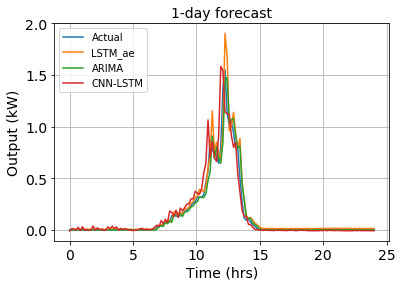

In [25]:
t = np.linspace(0,24,144) 
plt.plot(t,y_check_act_wp/1000, linewidth=1.5)
plt.plot(t,yhat_act_wp /1000, linewidth=1.5)
plt.plot(t,y/1000, linewidth=1.5)
plt.plot(t,yhat_act_wp_lstm/1000, linewidth=1.5)
plt.tick_params(axis='x', labelsize = 14)
plt.tick_params(axis='y', labelsize = 14)
plt.title('1-day forecast', fontsize = 14)
plt.ylabel('Output (kW)', fontsize = 14)
plt.xlabel('Time (hrs)', fontsize = 14)
plt.legend(['Actual','LSTM_ae','ARIMA', 'CNN-LSTM'], loc='upper left')
plt.savefig(fname = "L-ae_Phd_thesis_2.png", dpi=400,orientation='portrait')
plt.grid(b = True)
plt.show()

In [26]:
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit
from scipy.stats.distributions import t
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

n_iter = 10
ndays = 1
s_day = 6*24*ndays

rms_AR = np.zeros(n_iter, dtype= float)
mae_AR = np.zeros(n_iter, dtype= float)
mean_forecast_errors_AR = np.zeros(n_iter, dtype= float)

for i in range(0, n_iter):
    
    test_set, index = random_split(input_par,n)
    train_set = input_par.drop(input_par.index[index:index+n])
    output_sp = pd.DataFrame(train_set.loc[:,'output_power(t)'])
    output = scaler.inverse_transform(output_sp)
    
    arma_mod = ARIMA(output, order=(2, 1, 1)).fit()
    
    y_eval = pd.DataFrame(test_set.loc[:,'output_power(t)'])
    y_eval_tot  = y_eval[0:s_day].values
    y_eval_tot = y_eval_tot.reshape(-1,1)
    
    pred = scaler.inverse_transform(y_eval_tot)
    x = arma_mod.apply(pred)
    y  = x.predict()
    
    rms_AR[i] = np.sqrt(mean_squared_error(y_eval_tot, y))
    mae_AR[i] = mean_absolute_error(y_eval_tot, y)
    forecast_errors_AR = [y_eval_tot[k]-y[k] for k in range(len(y_eval_tot))]
    mean_forecast_errors_AR[i] = np.mean(forecast_errors_AR)

In [29]:
[np.max(mae_AR), np.min(rms_AR), np.mean(mae_AR)] 

[1244.5817892965902, 446.6180577113668, 716.3957541337938]

In [ ]:
print(np.std(rms_AR),np.std(mae_AR))

In [ ]:
from numpy import asarray
from numpy import savetxt

savetxt('rms_AR', rms_AR, delimiter=',')
# savetxt('rms_cnn_multi', rms_cnn_multi, delimiter=',')
# savetxt('rms_cnn', rms_cnn, delimiter=',')

savetxt('mae_AR', mae_AR, delimiter=',')
# savetxt('mae_cnn_multi', mae_cnn_multi, delimiter=',')
# savetxt('mae_cnn', mae_cnn, delimiter=',')

savetxt('mean_forecast_errors_AR', forecast_errors_AR, delimiter=',')
# savetxt('mean_forecast_errors_cnn_multi', forecast_errors_cnn_multi, delimiter=',')
# savetxt('mean_forecast_errors_cnn', forecast_errors_cnn, delimiter=',')
